In [1]:
import os

import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import time

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./preprocessed_apartment.csv')
df.head()

,city,district,dong,apartment,m2,price,floor,pre_m2,moving_date,num_people,people_by_m2,price_by_m2,price_by_pre_m2,year,month
0,8,1,1156,1504,196.21,450000.0,13.0,211.23,1976.06,480.0,120.0,7582.0,7043.0,2018,12
1,8,1,1706,4942,202.58,450000.0,5.0,252.31,2010.07,19.0,1.0,7343.0,5896.0,2018,12
2,8,1,1156,9746,139.83,320000.0,7.0,165.29,1982.04,1924.0,168.0,7565.0,6400.0,2018,12
3,8,1,393,15322,191.04,315000.0,2.0,219.22,1983.12,1204.0,84.0,5451.0,4750.0,2018,12
4,8,1,1156,1509,144.20,304000.0,10.0,158.68,1979.05,560.0,168.0,6969.0,6333.0,2018,12


In [3]:
df.shape

(6174900, 15)

In [4]:
y = df['price']
del df['price']

In [5]:
x_train, x_test,y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [6]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

* layer 14 / 1400 / 2800 / 1024 / 512 / 256 / 64 / 8 / 1 [relu]
* opt = adam,epoch = 150, batch = 500 / validation 0.3

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3025701 samples, validate on 1296729 samples
Epoch 1/150
3025701/3025701 [==============================] - 214s 71us/step - loss: 13503593.7434 - acc: 4.6568e-04 - val_loss: 548428.5447 - val_acc: 7.4804e-04

Epoch 00001: val_loss improved from inf to 548428.54470, saving model to ./model/01-548428.5447.hdf5
Epoch 2/150
3025701/3025701 [==============================] - 212s 70us/step - loss: 1346194.6737 - acc: 7.4462e-04 - val_loss: 1011246.0415 - val_acc: 7.9122e-04

Epoch 00002: val_loss did not improve from 548428.54470
Epoch 3/150
3025701/3025701 [==============================] - 212s 70us/step - loss: 1029516.0157 - acc: 9.7234e-04 - val_loss: 159789.4576 - val_acc: 0.0013

Epoch 00003: val_loss improved from 548428.54470 to 159789.45762, saving model to ./model/03-159789.4576.hdf5
Epoch 4/150
3025701/3025701 [==============================] - 212s 7


Epoch 00033: val_loss improved from 19453.90755 to 19033.75081, saving model to ./model/33-19033.7508.hdf5
Epoch 34/150
3025701/3025701 [==============================] - 208s 69us/step - loss: 110875.7314 - acc: 0.0029 - val_loss: 46898.4074 - val_acc: 0.0028

Epoch 00034: val_loss did not improve from 19033.75081
Epoch 35/150
3025701/3025701 [==============================] - 210s 70us/step - loss: 104528.3184 - acc: 0.0031 - val_loss: 18738.5656 - val_acc: 0.0062

Epoch 00035: val_loss improved from 19033.75081 to 18738.56557, saving model to ./model/35-18738.5656.hdf5
Epoch 36/150
3025701/3025701 [==============================] - 210s 69us/step - loss: 140201.2868 - acc: 0.0030 - val_loss: 90348.2521 - val_acc: 3.7093e-04

Epoch 00036: val_loss did not improve from 18738.56557
Epoch 37/150
3025701/3025701 [==============================] - 210s 70us/step - loss: 102259.4560 - acc: 0.0031 - val_loss: 34526.3337 - val_acc: 0.0027

Epoch 00037: val_loss did not improve from 18738.56

3025701/3025701 [==============================] - 211s 70us/step - loss: 61724.3415 - acc: 0.0038 - val_loss: 14401.0271 - val_acc: 0.0070

Epoch 00071: val_loss improved from 15167.69729 to 14401.02709, saving model to ./model/71-14401.0271.hdf5
Epoch 72/150
3025701/3025701 [==============================] - 211s 70us/step - loss: 64550.9622 - acc: 0.0038 - val_loss: 12828.5754 - val_acc: 0.0080

Epoch 00072: val_loss improved from 14401.02709 to 12828.57540, saving model to ./model/72-12828.5754.hdf5
Epoch 73/150
3025701/3025701 [==============================] - 211s 70us/step - loss: 59417.1337 - acc: 0.0040 - val_loss: 12546.7673 - val_acc: 0.0075

Epoch 00073: val_loss improved from 12828.57540 to 12546.76729, saving model to ./model/73-12546.7673.hdf5
Epoch 74/150
3025701/3025701 [==============================] - 211s 70us/step - loss: 73420.8968 - acc: 0.0041 - val_loss: 16517.4149 - val_acc: 0.0045

Epoch 00074: val_loss did not improve from 12546.76729
Epoch 75/150
3025701/

3025701/3025701 [==============================] - 210s 69us/step - loss: 102052.2851 - acc: 0.0033 - val_loss: 37300.7916 - val_acc: 0.0028

Epoch 00109: val_loss did not improve from 12546.76729
Epoch 110/150
3025701/3025701 [==============================] - 210s 69us/step - loss: 79628.2886 - acc: 0.0037 - val_loss: 25130.6588 - val_acc: 0.0025

Epoch 00110: val_loss did not improve from 12546.76729
Epoch 111/150
3025701/3025701 [==============================] - 210s 69us/step - loss: 74022.1227 - acc: 0.0037 - val_loss: 34472.2450 - val_acc: 8.8530e-04

Epoch 00111: val_loss did not improve from 12546.76729
Epoch 112/150
3025701/3025701 [==============================] - 210s 70us/step - loss: 92155.6992 - acc: 0.0037 - val_loss: 18307.6231 - val_acc: 0.0068

Epoch 00112: val_loss did not improve from 12546.76729
Epoch 113/150
3025701/3025701 [==============================] - 211s 70us/step - loss: 60954.4782 - acc: 0.0037 - val_loss: 19807.5104 - val_acc: 0.0031

Epoch 00113: v

3025701/3025701 [==============================] - 211s 70us/step - loss: 47861.9662 - acc: 0.0047 - val_loss: 19154.2068 - val_acc: 0.0041

Epoch 00147: val_loss did not improve from 8890.83301
Epoch 148/150
3025701/3025701 [==============================] - 211s 70us/step - loss: 41723.1610 - acc: 0.0048 - val_loss: 13369.5128 - val_acc: 0.0040

Epoch 00148: val_loss did not improve from 8890.83301
Epoch 149/150
3025701/3025701 [==============================] - 211s 70us/step - loss: 50367.3174 - acc: 0.0045 - val_loss: 23060.1959 - val_acc: 0.0026

Epoch 00149: val_loss did not improve from 8890.83301
Epoch 150/150
3025701/3025701 [==============================] - 211s 70us/step - loss: 44944.2634 - acc: 0.0046 - val_loss: 30428.4431 - val_acc: 0.0081

Epoch 00150: val_loss did not improve from 8890.83301


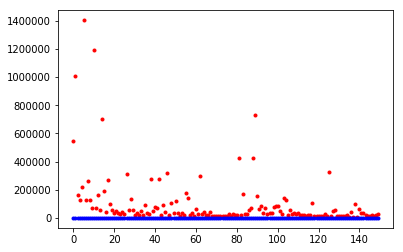

time:  31731.6502


176.90971144833745

In [7]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(1400, activation='relu'))
model.add(Dense(2800, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

start = time.time()
history = model.fit(x_train, y_train, 
                    validation_split=0.3, 
                    epochs=150, 
                    batch_size=500, 
                    callbacks=[checkpointer])


y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print('time: ', round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

Train on 3025701 samples, validate on 1296729 samples
Epoch 1/200
3025701/3025701 [==============================] - 147s 49us/step - loss: 16340512.8596 - acc: 4.1412e-04 - val_loss: 512746.7403 - val_acc: 0.0010

Epoch 00001: val_loss improved from inf to 512746.74025, saving model to ./model/01-512746.7403.hdf5
Epoch 2/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 1826374.4843 - acc: 7.2942e-04 - val_loss: 225767.1511 - val_acc: 0.0019

Epoch 00002: val_loss improved from 512746.74025 to 225767.15108, saving model to ./model/02-225767.1511.hdf5
Epoch 3/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 1274159.0033 - acc: 8.5402e-04 - val_loss: 317322.0732 - val_acc: 0.0014

Epoch 00003: val_loss did not improve from 225767.15108
Epoch 4/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 743667.3728 - acc: 9.5746e-04 - val_loss: 313077.2372 - val_acc: 9.6396e-04

Epoch 00004: val_loss did not impro

3025701/3025701 [==============================] - 147s 48us/step - loss: 96521.2366 - acc: 0.0028 - val_loss: 70415.6903 - val_acc: 0.0014

Epoch 00037: val_loss did not improve from 16303.78213
Epoch 38/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 92046.1635 - acc: 0.0029 - val_loss: 95602.5627 - val_acc: 0.0018

Epoch 00038: val_loss did not improve from 16303.78213
Epoch 39/200
3025701/3025701 [==============================] - 145s 48us/step - loss: 89321.1765 - acc: 0.0029 - val_loss: 15218.1049 - val_acc: 0.0054

Epoch 00039: val_loss improved from 16303.78213 to 15218.10490, saving model to ./model/39-15218.1049.hdf5
Epoch 40/200
3025701/3025701 [==============================] - 145s 48us/step - loss: 114505.9271 - acc: 0.0030 - val_loss: 31600.5794 - val_acc: 0.0051

Epoch 00040: val_loss did not improve from 15218.10490
Epoch 41/200
3025701/3025701 [==============================] - 145s 48us/step - loss: 104704.4430 - acc: 0.0028 - val_loss:

3025701/3025701 [==============================] - 146s 48us/step - loss: 57606.7953 - acc: 0.0039 - val_loss: 12083.9931 - val_acc: 0.0047

Epoch 00075: val_loss improved from 14432.72823 to 12083.99305, saving model to ./model/75-12083.9931.hdf5
Epoch 76/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 70411.4709 - acc: 0.0040 - val_loss: 35045.7014 - val_acc: 0.0061

Epoch 00076: val_loss did not improve from 12083.99305
Epoch 77/200
3025701/3025701 [==============================] - 145s 48us/step - loss: 78202.5536 - acc: 0.0038 - val_loss: 230826.9568 - val_acc: 5.1283e-04

Epoch 00077: val_loss did not improve from 12083.99305
Epoch 78/200
3025701/3025701 [==============================] - 145s 48us/step - loss: 43915.6845 - acc: 0.0043 - val_loss: 43726.6950 - val_acc: 0.0012

Epoch 00078: val_loss did not improve from 12083.99305
Epoch 79/200
3025701/3025701 [==============================] - 145s 48us/step - loss: 86860.0283 - acc: 0.0036 - val_lo

3025701/3025701 [==============================] - 146s 48us/step - loss: 54489.9731 - acc: 0.0045 - val_loss: 8679.0785 - val_acc: 0.0084

Epoch 00113: val_loss did not improve from 7713.00478
Epoch 114/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 54465.1413 - acc: 0.0040 - val_loss: 14405.3260 - val_acc: 0.0076

Epoch 00114: val_loss did not improve from 7713.00478
Epoch 115/200
3025701/3025701 [==============================] - 145s 48us/step - loss: 47738.6004 - acc: 0.0043 - val_loss: 21553.6462 - val_acc: 0.0014

Epoch 00115: val_loss did not improve from 7713.00478
Epoch 116/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 48105.1979 - acc: 0.0043 - val_loss: 16110.3439 - val_acc: 0.0038

Epoch 00116: val_loss did not improve from 7713.00478
Epoch 117/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 47501.9130 - acc: 0.0043 - val_loss: 89583.3402 - val_acc: 1.3418e-04

Epoch 00117: val_los

3025701/3025701 [==============================] - 146s 48us/step - loss: 40764.3864 - acc: 0.0046 - val_loss: 68931.0592 - val_acc: 0.0031

Epoch 00151: val_loss did not improve from 7577.52899
Epoch 152/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 40330.8462 - acc: 0.0050 - val_loss: 8336.7631 - val_acc: 0.0104

Epoch 00152: val_loss did not improve from 7577.52899
Epoch 153/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 39851.3484 - acc: 0.0045 - val_loss: 39664.9302 - val_acc: 0.0040

Epoch 00153: val_loss did not improve from 7577.52899
Epoch 154/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 35838.6841 - acc: 0.0047 - val_loss: 24858.6715 - val_acc: 0.0018

Epoch 00154: val_loss did not improve from 7577.52899
Epoch 155/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 40397.7860 - acc: 0.0047 - val_loss: 39416.3176 - val_acc: 0.0013

Epoch 00155: val_loss di

3025701/3025701 [==============================] - 146s 48us/step - loss: 38468.4975 - acc: 0.0052 - val_loss: 13967.9270 - val_acc: 0.0072

Epoch 00190: val_loss did not improve from 7577.52899
Epoch 191/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 33710.1597 - acc: 0.0048 - val_loss: 23150.8737 - val_acc: 0.0060

Epoch 00191: val_loss did not improve from 7577.52899
Epoch 192/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 31540.3024 - acc: 0.0052 - val_loss: 6410.7995 - val_acc: 0.0110

Epoch 00192: val_loss improved from 7577.52899 to 6410.79947, saving model to ./model/192-6410.7995.hdf5
Epoch 193/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 28438.9662 - acc: 0.0047 - val_loss: 18171.8842 - val_acc: 0.0028

Epoch 00193: val_loss did not improve from 6410.79947
Epoch 194/200
3025701/3025701 [==============================] - 146s 48us/step - loss: 44053.5782 - acc: 0.0055 - val_loss: 717

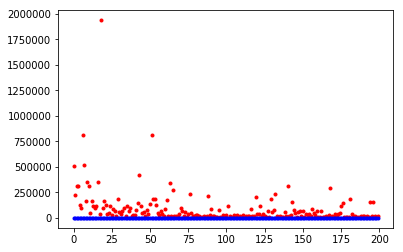

time:  29352.8549


120.86004337980673

In [8]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(1400, activation='relu'))
model.add(Dense(2800, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

start = time.time()
history = model.fit(x_train, y_train, 
                    validation_split=0.3, 
                    epochs=200, 
                    batch_size=1000, 
                    callbacks=[checkpointer])


y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print('time: ', round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

In [9]:
from keras.models import load_model
model = load_model('./model/138-8890.8330.hdf5')
modelPred = model.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

94.78360299149645

In [10]:
model = load_model('./model/192-6410.7995.hdf5')
modelPred = model.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

80.72560649988823